* Name - Pritam Biswas
* email - pb2796@columbia.edu
* UNI - pb2796

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd

In [5]:
data = pd.read_csv("fire_nrt_V1_96617.csv") 

In [30]:
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [31]:
lat=data['latitude'].to_numpy()

In [32]:
long=data['longitude'].to_numpy()

Question 1.1

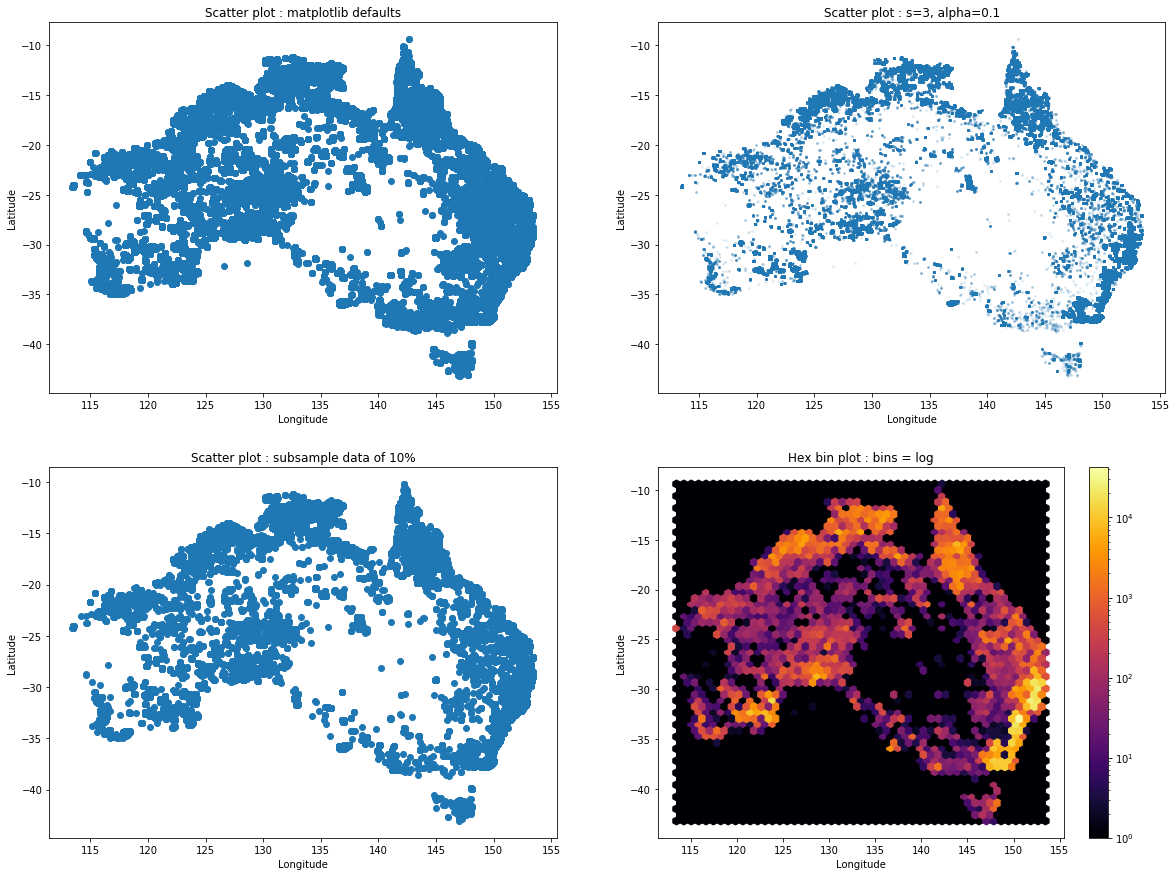

In [33]:
# Question 1.1
sample_frac=0.1
sample=data.loc[np.random.choice(data.index, int(sample_frac*len(lat)), replace=False)]
sample_lat=sample['latitude'].to_numpy()
sample_long=sample['longitude'].to_numpy()

fig, ax = plt.subplots(2, 2, figsize=(20, 15))


ax[0,0].scatter(long, lat)
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_title("Scatter plot : matplotlib defaults")

ax[0,1].scatter(long, lat, s=3, alpha=.1)
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_ylabel('Latitude')
ax[0,1].set_title("Scatter plot : s=3, alpha=0.1")

hex=ax[1,1].hexbin(long, lat, bins='log',gridsize=50, cmap='inferno')
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('Latitude')
ax[1,1].set_title("Hex bin plot : bins = log")
# plt.colorbar()
# plt.axis("off")

ax[1,0].scatter(sample_long, sample_lat)
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_title("Scatter plot : subsample data of 10%")

fig.colorbar(hex, ax=ax[1,1])
plt.show()

# ax[0,0].scatter([1,2], [3,4])

Question 1.2 

We can see that most of the anomalies are located along the coast. 
The south-eastern and north western parts of the country seemed to contain most of the anomalies.
The plot with alpha reduces some of the overplotting and helps identify the clusters of anomalies better.
The interior part of continent seems to be less affected by it.

Question 2.1

In [34]:

bright=data['bright_ti4'].to_numpy()

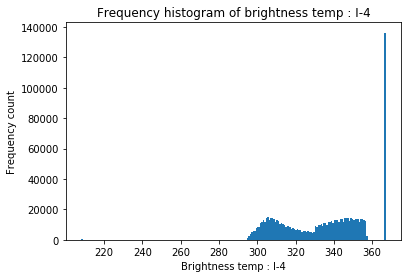

In [35]:
plt.hist(bright, bins="auto")
plt.xlabel('Brightness temp : I-4')
plt.ylabel('Frequency count')
plt.title('Frequency histogram of brightness temp : I-4')
plt.show()


As we can see from the histogram, there is a big spike for for temp > 360, we are taking that as a threshold between saturated and unsaturated.

In [36]:
less_data = data.loc[(data['bright_ti4'] < 360)]

In [37]:
more_data = data.loc[(data['bright_ti4'] >= 360)]

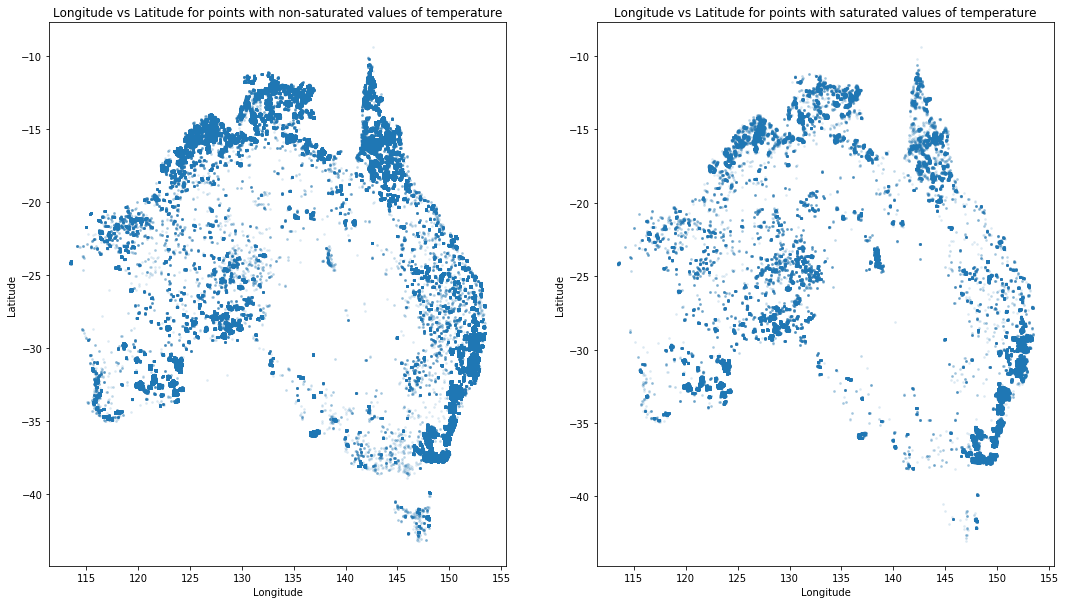

In [38]:
less_lat=less_data['latitude'].to_numpy()
less_long=less_data['longitude'].to_numpy()

more_lat=more_data['latitude'].to_numpy()
more_long=more_data['longitude'].to_numpy()


fig, ax = plt.subplots(1, 2, figsize=(18, 10))
ax[0].scatter(less_long, less_lat,s=3,alpha=.1)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title("Longitude vs Latitude for points with non-saturated values of temperature")

ax[1].scatter(more_long, more_lat, s=3, alpha=.1)
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title("Longitude vs Latitude for points with saturated values of temperature")
plt.show()

From the above two plots we can see that both unsaturated and unsaturated temperature points occur usually in the same regions. This indicates a connection between the saturated and unsaturated temperature points. We can say that the source which is causing the temperature rise in both these plots would be the same. The source seems to have a greater effect on the saturated points, which causes a larger temperature rise. The temperature for the unsaturated points is lower due to more distance from the actual source o heat. 

Question 2.2

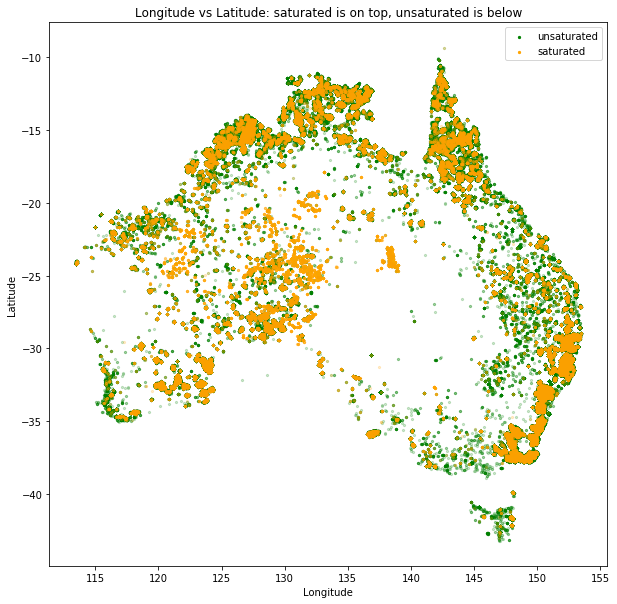

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(less_long, less_lat,s=5, alpha=.2, label = 'unsaturated',color='green')
ax.scatter(more_long, more_lat,s=5,alpha=.2, label = 'saturated',color='orange')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title("Longitude vs Latitude: saturated is on top, unsaturated is below")


for leg in plt.legend().legendHandles:
    leg.set_alpha(1)

# print(leg)
plt.show()

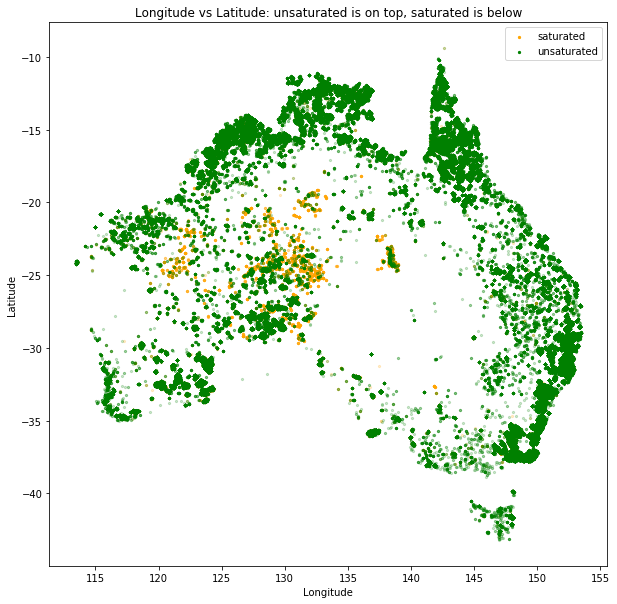

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(more_long, more_lat,s=5,alpha=.2, label = 'saturated', color='orange')
ax.scatter(less_long, less_lat,s=5, alpha=.2, label = 'unsaturated', color='green')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title("Longitude vs Latitude: unsaturated is on top, saturated is below")

for leg in plt.legend().legendHandles:
    leg.set_alpha(1)

plt.show()

From the earlier two plots we were able to conclude that the unsaturated points occur together in most of the regions. From these two plots with overlapping points, we also understand that saturated temperature points are surrounded by unsaturated temperature points. This observation is clearly visible when saturated points are plotted on top of unsaturated points. This can mean that the saturated points are the epicenters of the fires, so their temperatures are very high. The unsaturated points are the areas where the fire gradually started spreading. So these unsaturated areas may have small ongoing fires.

Question 2.3

In [41]:
# finding mean and S.D. of temp values of unsaturated points
temp_mean=np.mean(less_data['bright_ti4'].to_numpy())
temp_std=np.std(less_data['bright_ti4'].to_numpy())

In [42]:
#computing mean + 0.5*S.D. , mean - 0.5*S.D.
up=temp_mean+0.5*temp_std
dw=temp_mean-0.5*temp_std
# temp_std

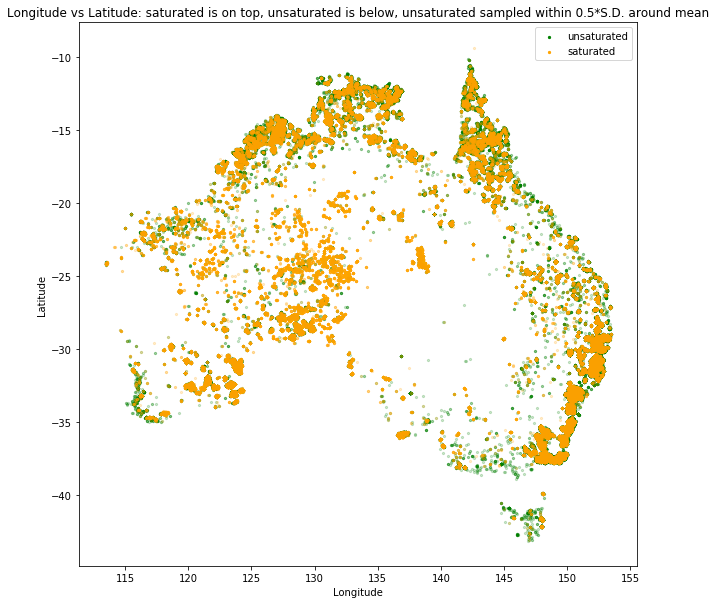

In [45]:
#sampling unsaturated data based on upper and lower bounds
less_data_sampled=less_data.loc[(less_data['bright_ti4'] >= dw) & (less_data['bright_ti4'] <=up)]

less_lat_sampled=less_data_sampled['latitude'].to_numpy()
less_long_sampled=less_data_sampled['longitude'].to_numpy()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(less_long_sampled, less_lat_sampled,s=5, alpha=.2, label = 'unsaturated',color='green')
ax.scatter(more_long, more_lat,s=5,alpha=.2, label = 'saturated',color='orange')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title("Longitude vs Latitude: saturated is on top, unsaturated is below, unsaturated sampled within 0.5*S.D. around mean")


for leg in plt.legend().legendHandles:
    leg.set_alpha(1)

# print(leg)
plt.show()


Here we have considered only the unsaturated points which lie within 0.5 times the standard deviation of the mean value. This gives us the set of unsaturated points which are very close to the mean values. This helps us remove the outlier values and helps reduce overplotting. We can now see the heavy fire areas clearly in the country. We see some areas of high temperatures even in the interior of the continent.